In [3]:
import json
import tqdm
import pandas as pd
import langdetect
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [4]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

In [ ]:
df = pd.read_csv('data.csv', index_col=[0])

df = df[['username', 'lang', 'text', 'created_at']]

#remove qme #media links 
df = df.loc[df.lang != 'qme']
#remove zxx #used when the language is unknown
df = df.loc[df.lang != 'zxx']
#If no language classification can be made for a Tweet
df = df.loc[df.lang != 'und']
#tweets with hashtags only
df = df.loc[df.lang != 'qht']
#lang:qam for tweets with mentions only (works for tweets since 2022-06
df = df.loc[df.lang != 'qam']
#questo non so che è ma lo toglierei
df = df.loc[df.lang != 'art']

no_english = df.loc[df.lang != 'en']

print(f"We have {len(df.loc[df.lang != 'en'])} tweets in languages that are not English.")

print(f"We have {len(df.loc[df.lang != 'en'].username.unique())} different companies tweeting in non-english languages:")

print(f"we have {len(df.lang.unique())} different languages")

print("such languages are:")
df.loc[df.lang != 'en'].lang.unique()

In [ ]:
from langdetect import detect
from tqdm.notebook import tqdm

matches=0 
for index, row in tqdm(df.iterrows()):
    l = detect(row['text'])
    if l != row['lang']:
        if l:
            df.loc[index, 'new_lang'] = l
    else:
        df.loc[index, 'new_lang'] = row['lang']
        matches+=1
print(matches)

In [ ]:
df.loc[(df.lang != df.new_lang)]

In [ ]:
df.loc[1418, "new_lang"] = 'en'
df.loc[4557, "new_lang"] = 'it'
df.loc[[4606, 4347, 4378], "new_lang"] = 'fr'
df.loc[4441, "new_lang"] = 'de'
df.loc[58, "new_lang"] = 'en'


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
for index, row in tqdm(df.loc[(df.lang != df.new_lang) & (df.username == 'lego_group')].iterrows()):
    df.loc[index, 'new_lang'] = 'en'
df.loc[(df.lang != df.new_lang) & (df.username == 'lego_group')]

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
for index, row in tqdm(df.loc[(df.lang != df.new_lang) & (df.username == 'sap')].iterrows()):
    df.loc[index, 'new_lang'] = 'en'
df.loc[(df.lang != df.new_lang) & (df.username == 'sap')]

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
for index, row in tqdm(df.loc[(df.lang != df.new_lang) & (df.username == 'verbundag')].iterrows()):
    df.loc[index, 'new_lang'] = 'de'
df.loc[(df.lang != df.new_lang) & (df.username == 'verbundag')]

In [ ]:
df.loc[[2078,2125,2134,2197,2208,2210,2233,10037,10073], "new_lang"] = "de"
df.loc[[2727,2756,2758,2796,2815,2839,2866], "new_lang"] = "fr"
df.loc[[2122,2146,2840,3794,3803,3839,3807,3841,3871,3830,3843,3880,4141,4167,7023,7118,8085,8106], "new_lang"] = "en"

In [ ]:
print(f"After manually cleaning the data we have {len(df.loc[df.new_lang != 'en'])} tweets in languages that are not English.")

In [ ]:
df.new_lang.unique()

#### How many tweets for each language?

In [5]:
df = pd.read_csv('translated.csv', index_col=[0])

(0.0, 1.0, 0.0, 1.0)

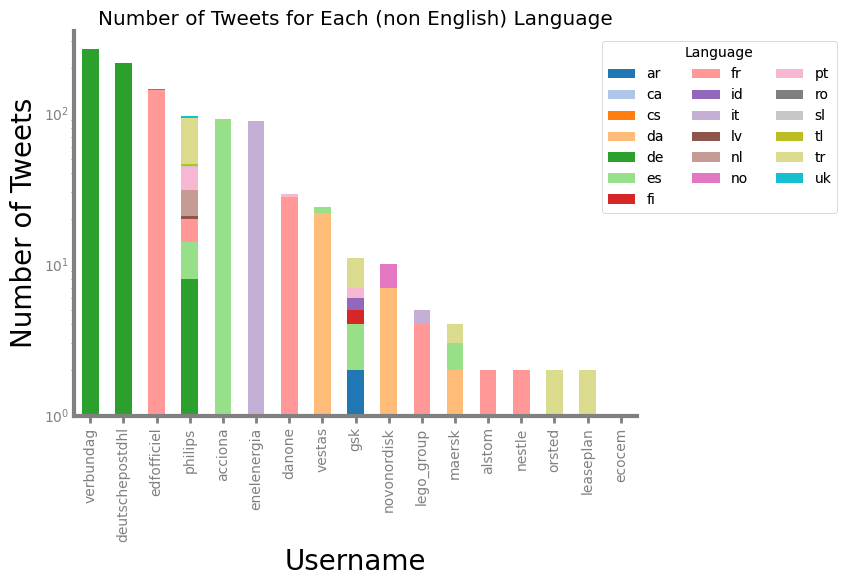

In [38]:
language_map = {
    'en': 'English',
    'es': 'Spanish',
    'fr': 'French',
    'pt': 'Portuguese',
    'de': 'German',
    'ca': 'Catalan',
    'ro': 'Romanian',
    'it': 'Italian',
    'tr': 'Turkish',
    'ar': 'Arabic',
    'id': 'Indonesian',
    'fi': 'Finnish',
    'da': 'Danish',
    'no': 'Norwegian',
    'tl': 'Tagalog',
    'nl': 'Dutch',
    'sl': 'Slovenian',
    'uk': 'Ukrainian',
    'lv': 'Latvian',
    'cs': 'Czech'
}

palette = sns.color_palette("tab20", n_colors=20)
sns.set_palette(palette)

df_plot = df.loc[df.new_lang != 'en'].groupby(['new_lang', 'username']).size().reset_index().pivot(columns='new_lang', index='username', values=0)

# Summing up the values for each username
df_plot['total_tweets'] = df_plot.sum(axis=1)

# Sorting by total_tweets in descending order
df_plot = df_plot.sort_values(by='total_tweets', ascending=False)

# Plotting
fig, (ax_main, ax_legend) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), gridspec_kw={'width_ratios': [4, 1]})

# Plot Number of Tweets per Day
df_plot.drop(columns='total_tweets').plot(kind='bar', stacked=True, ax=ax_main)
ax_main.set_title('Number of Tweets for Each (non English) Language')
ax_main.set_xlabel('Username')
ax_main.set_ylabel('Number of Tweets')
ax_main.set_yscale('log')
ax_main.grid(False)
handles, labels = ax_main.get_legend_handles_labels()
ax_main.get_legend().remove()

# Legend on the ax_legend
legend = ax_legend.legend(handles, labels, loc="center left", bbox_to_anchor=(-0.8, 0.75), ncol=3, markerscale=0.3, fontsize=10, title="Language")
ax_legend.add_artist(legend)
ax_legend.axis('off')

#### Translate non-english texts

In [ ]:
!pip install translate
!pip install googletrans==3.1.0-alpha

In [ ]:
from tqdm.notebook import tqdm
from googletrans import Translator

translator = Translator()

For now I am using google translate because is free and has no limit, maybe I can try deepl but for now i just found an api with a small free translation rate per day

In [ ]:
english_texts = {}
for index, row in tqdm(df.loc[df.new_lang != "en"].iterrows(), total=len(df)):
    translated = translator.translate(row['text'], src=row['new_lang'], dest="en").text
    english_texts[index] = translated

In [ ]:
english_texts

In [ ]:
len(english_texts)

In [ ]:
for idx, text in english_texts.items():
    df.loc[idx, "text"] = text

In [ ]:
df.drop('en_text', axis=1)

In [ ]:
df.head()

In [ ]:
for index, row in no_english.iterrows():
    if index in df.index:
        df.loc[index, 'text'] = row['en_text']
df

In [ ]:
df = df.drop(columns=['en_text'])

In [ ]:
df[['username', 'text', 'created_at', 'new_lang']].to_csv('translated.csv')